In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the data
path = "/content/Clean_data_PCA.xlsx"

In [3]:
PCA_df = pd.read_excel(path)

In [4]:
PCA_df.head()

,Bearer Id,Start ms,End ms,Dur. (ms),IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,104446,467.0,829.0,243504.0,3.556251e+13,16255,109.795706,17.662883,28.0,41.0,...,17400892.0,14644405.0,7682779.0,20806551.0,519620584.0,2710989.0,318297673.0,3820483.0,43336429.0,556406594.0
1,104450,641.0,444.0,236570.0,3.530731e+13,12443,46.000000,7.000000,46.0,46.0,...,19431593.0,16964908.0,11758420.0,9907089.0,715350506.0,10250922.0,290582586.0,1716480.0,40719212.0,757526492.0
2,104466,804.0,199.0,231780.0,3.520031e+13,26535,109.795706,17.662883,23.0,51.0,...,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
3,104468,676.0,176.0,230839.0,8.636750e+13,12453,39.000000,2.000000,22.0,46.0,...,3334865.0,14454366.0,17917894.0,1530332.0,293492651.0,1362536.0,495376623.0,11684759.0,30713366.0,329159454.0
4,34855,810.0,294.0,238915.0,3.586111e+13,12443,38.000000,1.000000,49.0,47.0,...,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0


In [5]:
PCA_df.tail()

,Bearer Id,Start ms,End ms,Dur. (ms),IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
142812,34417,451.0000,214.00000,81230.000000,3.548311e+13,5964,32.000000,0.000000,52.000000,65.000000,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
142813,73432,483.0000,187.00000,97970.000000,3.566051e+13,1738,27.000000,2.000000,23.000000,54.000000,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
142814,134618,283.0000,810.00000,98249.000000,3.572121e+13,33617,43.000000,6.000000,43.000000,47.000000,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
142815,134618,696.0000,327.00000,97910.000000,8.618620e+13,27309,37.000000,5.000000,34.000000,37.000000,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08
142816,134708,499.1882,498.80088,104608.560347,4.847455e+13,8751,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08


In [6]:
PCA_df.shape

(142817, 51)

In [7]:
PCA_df.dtypes

,0
Bearer Id,int64
Start ms,float64
End ms,float64
Dur. (ms),float64
IMEI,float64
Last Location Name,int64
Avg RTT DL (ms),float64
Avg RTT UL (ms),float64
Avg Bearer TP DL (kbps),float64
Avg Bearer TP UL (kbps),float64


In [8]:
PCA_df.count()

,0
Bearer Id,142817
Start ms,142817
End ms,142817
Dur. (ms),142817
IMEI,142817
Last Location Name,142817
Avg RTT DL (ms),142817
Avg RTT UL (ms),142817
Avg Bearer TP DL (kbps),142817
Avg Bearer TP UL (kbps),142817


In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Example DataFrame (replace with your actual dataset)
data = {
    'Bearer Id': ['id1', 'id2', 'id3'],
    'Start': ['start1', 'start2', 'start3'],
    'End': ['end1', 'end2', 'end3'],
    'IMSI': ['imsi1', 'imsi2', 'imsi3'],
    'MSISDN/Number': ['num1', 'num2', 'num3'],
    'IMEI': ['imei1', 'imei2', 'imei3'],
    'Last Location Name': ['loc1', 'loc2', 'loc3']
}
dataset = pd.DataFrame(data)

# Define categorical features
categorical_features = ['Bearer Id', 'Start', 'End', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name']

# OneHotEncoder
one_hot = OneHotEncoder()

# ColumnTransformer
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

# Transform the dataset
transformed_X = transformer.fit_transform(dataset)

# Convert to dense array (optional)
#transformed_X_dense = transformed_X.toarray()

print(transformed_X)

[[1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]]


In [10]:
# labelencoder
from sklearn.preprocessing import LabelEncoder

In [11]:
categorical_cols = []
for col in categorical_cols:
    encoder = LabelEncoder()
    dataset[col] = encoder.fit_transform(dataset[col])

In [12]:
# distributing the df into two components X and Y
X = PCA_df.drop(['Dur. (ms)'], axis=1)
y = PCA_df['Dur. (ms)']

In [13]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

In [16]:
# use algoritham KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)


In [19]:
y_pred

array([209390.,  60434.,  30505., ...,  79552., 120018.,  79158.])

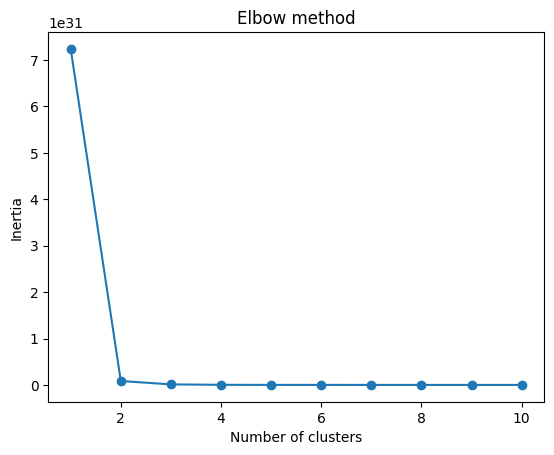

In [20]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(PCA_df)
clusters = kmeans.predict(PCA_df)
silhouette_score(PCA_df, clusters)




0.987857691799273

In [22]:
# Fitting K-mean algoritham To the training set
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)



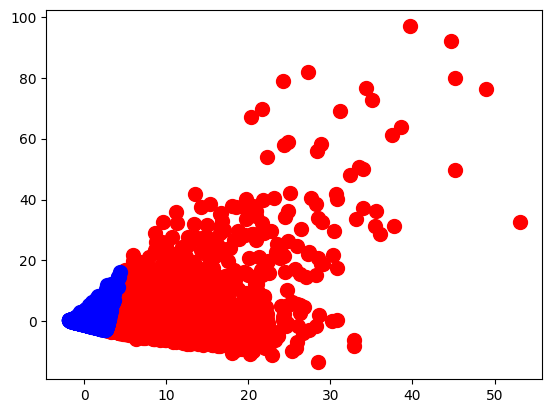

In [23]:
#plot K-means  sctter plot and culaster
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')



In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [27]:
# Select the numerical columns for PCA
numerical_columns = PCA_df.select_dtypes(include=['float64', 'int64']).columns

# Perform Min-Max scaling on the numerical columns
scaler = MinMaxScaler()
PCA_df[numerical_columns] = scaler.fit_transform(PCA_df[numerical_columns])

# Apply PCA
pca = PCA(n_components=2)
PCA_df_pca = pca.fit_transform(PCA_df[numerical_columns])

# Create a new DataFrame with the PCA components
PCA_df_pca = pd.DataFrame(PCA_df_pca, columns=['PC1', 'PC2'])

print(PCA_df_pca.head())

        PC1       PC2
0  0.503840 -0.146484
1 -0.298030 -0.499276
2  0.525448  0.525373
3  0.061084  0.200918
4 -0.325140 -0.152565


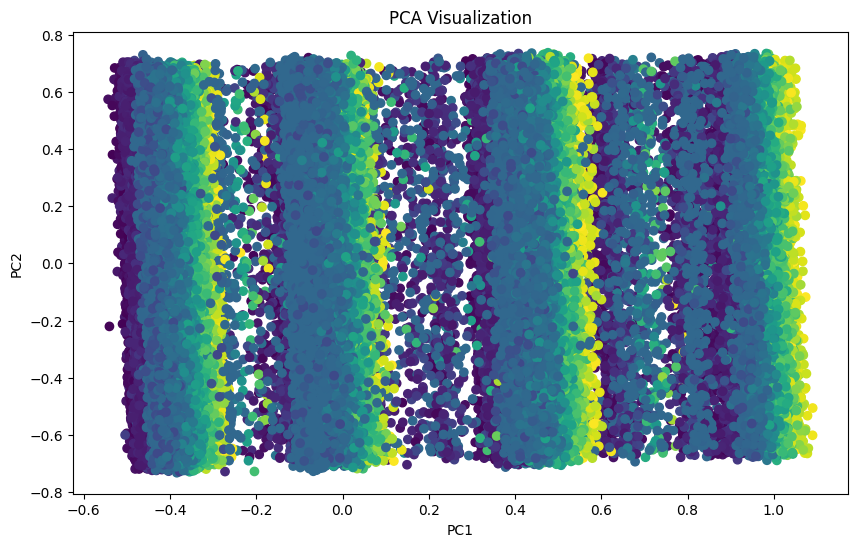

In [28]:
# Visualization of PCA : PC1 values represented by color
plt.figure(figsize=(10, 6))
plt.scatter(PCA_df_pca['PC1'], PCA_df_pca['PC2'], c=PCA_df['Dur. (ms)'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.show()

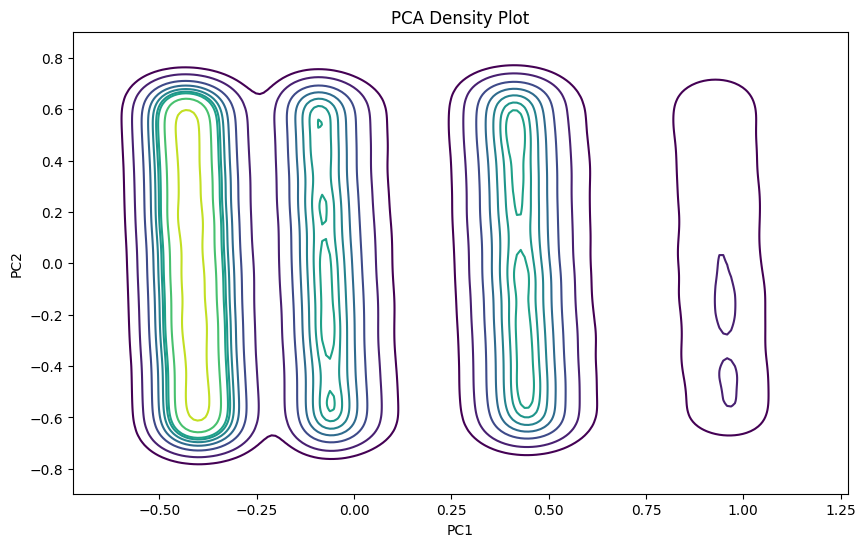

In [29]:
# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=PCA_df_pca, x='PC1', y='PC2', cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Density Plot')
plt.show()

In [30]:
df = pd.DataFrame(PCA_df)

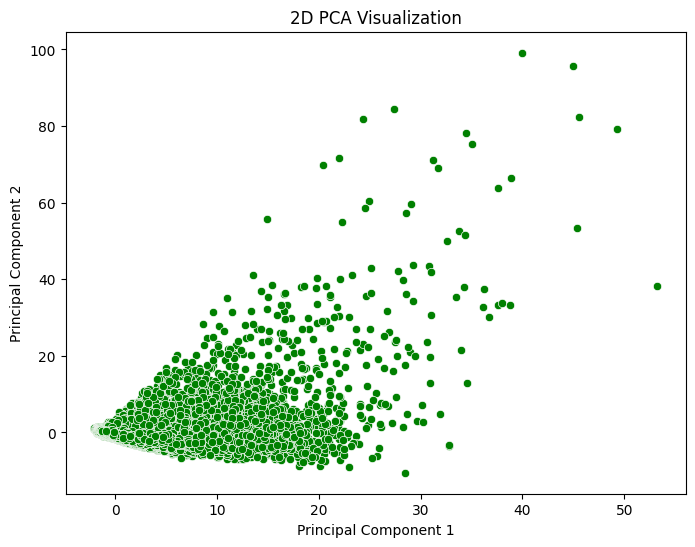

In [31]:
df = pd.DataFrame(PCA_df)

# Step 1: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

#  Plot the 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, color ='green')
plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
# Apply PCA
pca = PCA(n_components=2)

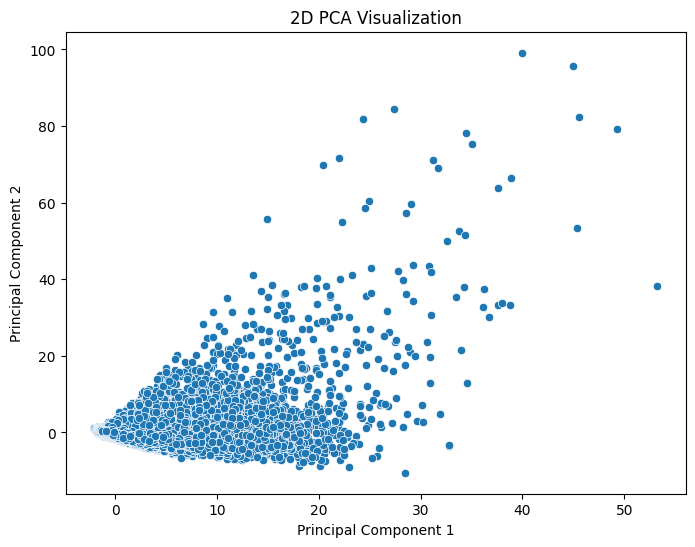

In [33]:
# Step 2: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pca_result = pca.fit_transform(scaled_data)

# Step 3: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 4: Plot the 2D Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

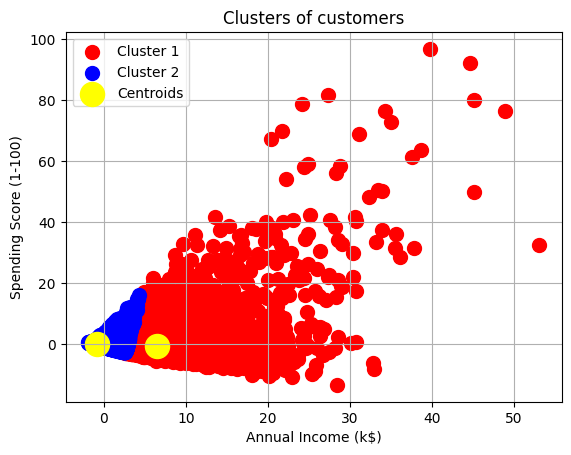

In [34]:
#plot K-means  sctter plot and culaster
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

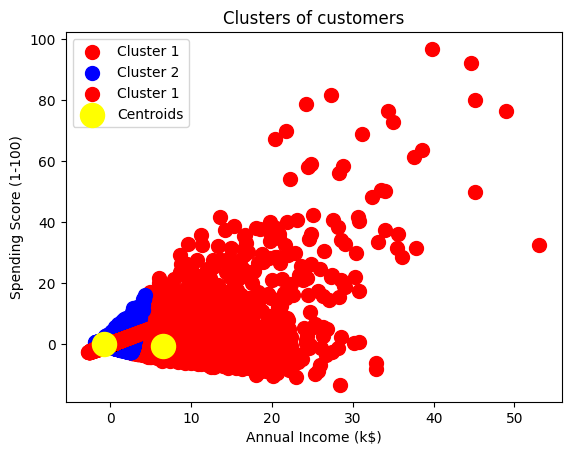

In [35]:
#plot K-means  sctter plot and culaster
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_train[y_kmeans == 1, 1], X_train[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

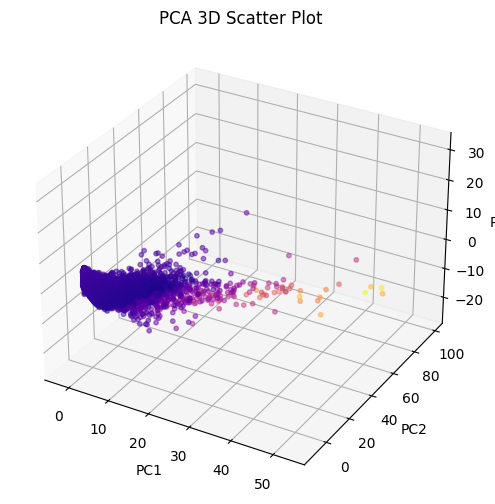

In [36]:
from mpl_toolkits.mplot3d import Axes3D
# Apply PCA to reduse to 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame with the PCA components
PCA_df_pca = pd
## 3D Scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=pca_result[:, 1], alpha = 0.5, s=10, cmap='plasma') # Copy by PC2
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D Scatter Plot')
plt.show()


In [37]:
from sklearn.preprocessing  import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score,precision_score,recall_score,f1_score


In [38]:
PCA_df.mean()

,0
Bearer Id,0.520477
Start ms,0.499680
End ms,0.499343
Dur. (ms),0.358008
IMEI,0.489752
Last Location Name,0.438932
Avg RTT DL (ms),0.001147
Avg RTT UL (ms),0.002482
Avg Bearer TP DL (kbps),0.036244
Avg Bearer TP UL (kbps),0.031275


In [39]:
PCA_df.std()

,0
Bearer Id,0.290169
Start ms,0.288977
End ms,0.288440
Dur. (ms),0.212412
IMEI,0.228448
Last Location Name,0.279979
Avg RTT DL (ms),0.005856
Avg RTT UL (ms),0.010727
Avg Bearer TP DL (kbps),0.064035
Avg Bearer TP UL (kbps),0.080267


In [40]:
# Export the DataFrame to an Excel file
df.to_excel('Task_002_data.xlsx', index=False)

In [41]:
from google.colab import files
files.download('Task_002_data.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>